# Word2Vec Implementation

Date: 2018-01-23

Reference: https://github.com/nlintz/TensorFlow-Tutorials/blob/master/08_word2vec.ipynb

In [2]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Configuration

In [40]:
batch_size=20
embedding_size=2
num_negativeSample=15

# Dataset: Sample Sentences

In [8]:
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]
print("The length of the sentence is", len(sentences))

The length of the sentence is 12


# Sentence to Words (Just cut!)

In [14]:
words=" ".join(sentences).split() # setnence를 Words단위로 split한다.
print("The length of words is", len(words))
print("\n")
print(words)

The length of words is 62


['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I', 'love', 'cats', 'and', 'dogs', 'we', 'all', 'love', 'cats', 'and', 'dogs', 'cats', 'and', 'dogs', 'are', 'great', 'sung', 'likes', 'cats', 'she', 'loves', 'dogs', 'cats', 'can', 'be', 'very', 'independent', 'cats', 'are', 'great', 'companions', 'when', 'they', 'want', 'to', 'be', 'cats', 'are', 'playful', 'cats', 'are', 'natural', 'hunters', "It's", 'raining', 'cats', 'and', 'dogs', 'dogs', 'and', 'cats', 'love', 'sung']


# Sentence to Counts

How many words appear in the data?

In [15]:
# 리스트 내의 요소가 몇번이나 반복되었는지 카운트를 해준다.
# Counter().most_common(n):= 상위 n개를 return 해준다. 
# () 공백으로 비웠을 경우, 모든 element를 return 한다.
count = collections.Counter(words).most_common()

In [16]:
print(count) # count가 실제로 어떻게 구성되었는지 보자

[('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3), ('the', 2), ('great', 2), ('sung', 2), ('be', 2), ('quick', 1), ('brown', 1), ('fox', 1), ('jumped', 1), ('over', 1), ('lazy', 1), ('dog', 1), ('I', 1), ('we', 1), ('all', 1), ('likes', 1), ('she', 1), ('loves', 1), ('can', 1), ('very', 1), ('independent', 1), ('companions', 1), ('when', 1), ('they', 1), ('want', 1), ('to', 1), ('playful', 1), ('natural', 1), ('hunters', 1), ("It's", 1), ('raining', 1)]


# Words vs. Count

Words List와 Count List가 어떻게 구성되었는지 비교해보자

In [21]:
print("words:", words[0:7]) # 받은 dataset 내의 단어 순서대로 ordering 되어 있다.
print("count:", count[0:7]) # most_common(출현 빈도수) 기준으로 ordering 되어 있다.

words: ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the']
count: [('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3), ('the', 2), ('great', 2)]


# Build Dictionaries

이제 슬슬 word vector를 만들어야 하기 때문에 단어에 인덱싱을 해보자

In [23]:
rdic=[idx[0] for idx in count] # count list에 있는 {cats,10}, {dogs, 6} 이런것에서 단어들만 뽑아낸다.
dic={w: idx for idx, w in enumerate(rdic)} # rdic에서 뽑아낸 단어들을 순서대로 0, 1, ...,(n-1) 인덱싱 한다.
vocab_size=len(dic) # 우리가 얻은 dataset에 있는 총 단어의 갯수
print("The total size of vocabulary is ", vocab_size)

The total size of vocabulary is  35


우리가 만든 rdic과 dic의 구성도 살펴보자

In [25]:
print("rdic: ", rdic)
print("\n")
print("dic: ", dic)

rdic:  ['cats', 'dogs', 'and', 'are', 'love', 'the', 'great', 'sung', 'be', 'quick', 'brown', 'fox', 'jumped', 'over', 'lazy', 'dog', 'I', 'we', 'all', 'likes', 'she', 'loves', 'can', 'very', 'independent', 'companions', 'when', 'they', 'want', 'to', 'playful', 'natural', 'hunters', "It's", 'raining']


dic:  {'cats': 0, 'dogs': 1, 'and': 2, 'are': 3, 'love': 4, 'the': 5, 'great': 6, 'sung': 7, 'be': 8, 'quick': 9, 'brown': 10, 'fox': 11, 'jumped': 12, 'over': 13, 'lazy': 14, 'dog': 15, 'I': 16, 'we': 17, 'all': 18, 'likes': 19, 'she': 20, 'loves': 21, 'can': 22, 'very': 23, 'independent': 24, 'companions': 25, 'when': 26, 'they': 27, 'want': 28, 'to': 29, 'playful': 30, 'natural': 31, 'hunters': 32, "It's": 33, 'raining': 34}


만약, dictionary에서 dog의 인덱싱번호를 알고싶다면?

In [26]:
print(dic['dog'])

15


In [27]:
print(rdic[15]) # 확인되었다!

dog


# Make Indexed word data (ordered)

우리가 받은 dataset(word로 구분된)에 아까 인덱싱한 번호를 부여해보자!

In [28]:
data=[dic[i] for i in words]
print(data)

[5, 9, 10, 11, 12, 13, 5, 14, 15, 16, 4, 0, 2, 1, 17, 18, 4, 0, 2, 1, 0, 2, 1, 3, 6, 7, 19, 0, 20, 21, 1, 0, 22, 8, 23, 24, 0, 3, 6, 25, 26, 27, 28, 29, 8, 0, 3, 30, 0, 3, 31, 32, 33, 34, 0, 2, 1, 1, 2, 0, 4, 7]


# Create Cbow_pairs

In [33]:
cbow_pairs=[]
# cbow 에서의 input은 현재 i번째 단어 기준으로 양쪽 window size 1만큼의 단어
# cbow 에서의 output은 현재 i번째 단어
# 이를 하기 위해, cbow_pair를 만듬 by using indexed words
for i in range(1, len(data)-1):
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
print(cbow_pairs[:10])

[[[5, 10], 9], [[9, 11], 10], [[10, 12], 11], [[11, 13], 12], [[12, 5], 13], [[13, 14], 5], [[5, 15], 14], [[14, 16], 15], [[15, 4], 16], [[16, 0], 4]]


In [35]:
print(len(cbow_pairs)) # cbow_pair가 몇개있는지 확인해보자

60


# Create Skip-gram pairs

In [36]:
skip_gram_pairs=[]
# cp[1]의 의미: [[i-1번째 단어, i+!번째 단어], i번째 단어] 중 i번째 단어를 의미
# cp[0][0]의 의미: [[i-1번째 단어, i+!번째 단어], i번째 단어] 중 i-1번째 단어를 의미
# cp[0][1]의 의미: [[i-1번째 단어, i+!번째 단어], i번째 단어] 중 i+1번째 단어를 의미
# 결국 이것이 하고자 하는 바는,
# [i번째 단어, i-1번째 단어], [i번째 단어, i+1번째 단어]를 pair로 만들고 싶다는 의미

for cp in cbow_pairs:
    skip_gram_pairs.append([cp[1], cp[0][0]])
    skip_gram_pairs.append([cp[1], cp[0][1]])
    
print(skip_gram_pairs[:5])

[[9, 5], [9, 10], [10, 9], [10, 11], [11, 10]]


# Generate Batch

In [39]:
def generate_batch(size):
    assert size < len(skip_gram_pairs) # batch size가 skip_gram_pair size보다 작으면 진행
    x_data=[]
    y_data=[]
    # random choice의 의미: skip_gram pair중에 random하게 몇번째 skip_gram pair를 쓸지 size만큼 list를 만들어낸다.
    # replace=False의 의미: no repeated elements
    # 이제 그 list가 r로 만들어졌다면,
    # x_data, y_data로 만들어준다.
    # Batch를 random하게 sampling한다고 생각하면 된다.
    r=np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])
        y_data.append([skip_gram_pairs[i][1]])
    return x_data, y_data

print(generate_batch(3))

([4, 0, 1], [[16], [22], [2]])


# Construct network

In [41]:
# training input
train_inputs=tf.placeholder(tf.int32, shape=[batch_size])

# training output
train_output=tf.placeholder(tf.int32, shape=[batch_size, 1])

# Embeddings for inputs
# Embedding matrix (Vocabsize X Embedding Size)를 uniform random하게 -1에서 1사이로 initialise 해준다.
# Lookup table의 의미: 행렬에 embedding matrix와 training inputs 저장
embeddings=tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0))
embed=tf.nn.embedding_lookup(embeddings, train_inputs) # Lookup table

# Weights Matrix: random uniform (-1,1)사이로 초기화시키기
nce_weights=tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0))
# Biases vecotr: 0으로 vocabulary size만큼 초기화시키기
nce_biases=tf.Variable(tf.zeros([vocab_size]))

# Loss 계산 for the Batch
# tf.nn.nce_loss의 의미: NCE 손실함수를 사용한다.
# NCE = Noise-Contrastive Estimation Loss Function defined for Negative Sampling
# NCE의 컨셉의미: 실제 단어에는 높은 확률을 부여하고, 노이즈 단어들에는 낮은 확률을 부여하는 것
# tf.nn.nce_loss: loss를 계산할 때마다 negative labels를 가진 새로운 샘플을 자동으로 생성한다.(?)
loss=tf.reduce_mean(
    tf.nn.nce_loss(weights=nce_weights, biases=nce_biases, inputs=embed, labels=train_output, num_sampled=num_negativeSample, num_classes=vocab_size))

# Adam Optimizer
# Adam Optimizer의 의미: 빨리 수렴하게 하는 방법 중 하나
# Learning rate = 0.01
train_op=tf.train.AdamOptimizer(0.01).minimize(loss)

# Run word2Vec!

In [45]:
# Launch the graph in a session
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    
    for step in range(5000):
        batch_inputs, batch_output = generate_batch(batch_size)
        _, loss_val=sess.run([train_op, loss], feed_dict={train_inputs: batch_inputs, train_output: batch_output})
        if step % 100 == 0:
            print("Loss at the step %d is %.5f" %(step, loss_val))
    
    # Final Embeddings
    # eval()의 의미: 문자열을 실행한 결과값 return
    trained_embeddings = embeddings.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Loss at the step 0 is 19.01916
Loss at the step 100 is 8.13440
Loss at the step 200 is 3.90518
Loss at the step 300 is 4.01362
Loss at the step 400 is 3.53714
Loss at the step 500 is 3.28075
Loss at the step 600 is 3.35736
Loss at the step 700 is 3.08029
Loss at the step 800 is 3.45209
Loss at the step 900 is 3.17329
Loss at the step 1000 is 2.94703
Loss at the step 1100 is 3.51902
Loss at the step 1200 is 3.28538
Loss at the step 1300 is 3.20617
Loss at the step 1400 is 2.98876
Loss at the step 1500 is 3.21382
Loss at the step 1600 is 3.10652
Loss at the step 1700 is 3.19409
Loss at the step 1800 is 3.10234
Loss at the step 1900 is 2.92681
Loss at the step 2000 is 3.06823
Loss at the step 2100 is 2.94842
Loss at the step 2200 is 3.07811
Loss at the step 2300 is 3.25209
Loss at the step 2400 is 2.80193
Loss at the step 2500 is 2.82101
Loss at the step 2600 is 3.13590
Loss at the step 2700 is 2.92625
Loss at the s

In [46]:
trained_embeddings.shape

(35, 2)

In [47]:
print(vocab_size)

35


# Plot Results

Plot Word2vec when embedding size is 2

In [48]:
print(trained_embeddings)

[[-4.3618722   0.10700534]
 [-6.38391161  0.4664636 ]
 [-3.91290402  4.14228678]
 [-0.15818548  5.30797243]
 [ 0.01881921  6.0780282 ]
 [-0.37260032  1.10592616]
 [-2.14562201  0.34403551]
 [-0.69799215  1.21435916]
 [-0.7658056   1.30669761]
 [ 0.12967163  2.67524672]
 [-1.12511432  0.34218532]
 [ 0.27279338  3.78863263]
 [-0.75296992  0.54229659]
 [ 0.10826022  2.45220542]
 [-0.27550861  1.10808837]
 [-0.02810714  2.31940937]
 [-2.23359966  0.04854407]
 [-0.07485858  7.31920624]
 [-4.27003527  0.01279355]
 [-0.48502484  5.68641376]
 [-5.07944536  1.09617853]
 [-5.77786255  0.40393871]
 [-2.53349495  0.69428182]
 [-2.37904477  0.17847686]
 [-0.32969964  3.56110883]
 [-0.20349298  2.15235019]
 [-1.06992054  0.56072778]
 [-0.36699566  1.25629938]
 [-0.76630569  0.86080134]
 [-1.08926606  0.66645718]
 [-4.84343719  0.54848105]
 [-2.79810715  0.13097832]
 [ 0.07285771  4.11188889]
 [-2.56277752  0.0958671 ]
 [ 0.04580789  4.98284054]]


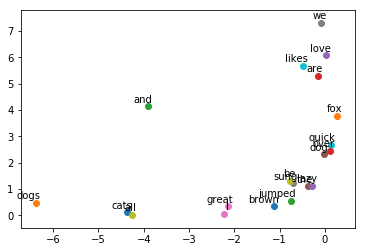

In [69]:
if trained_embeddings.shape[1]==2:
    labels=rdic[:20] # 가장 frequent한 top 20 단어들을 뽑아낸다.
    for i,label in enumerate(labels):
        x,y=trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    plt.show()
    plt.savefig('Word2Vec.png')